# Question 1

$$
\frac{dy(x)}{dx} = y'(x) = -50(y - \cos(x))
$$
# 1.1 \& 1.2

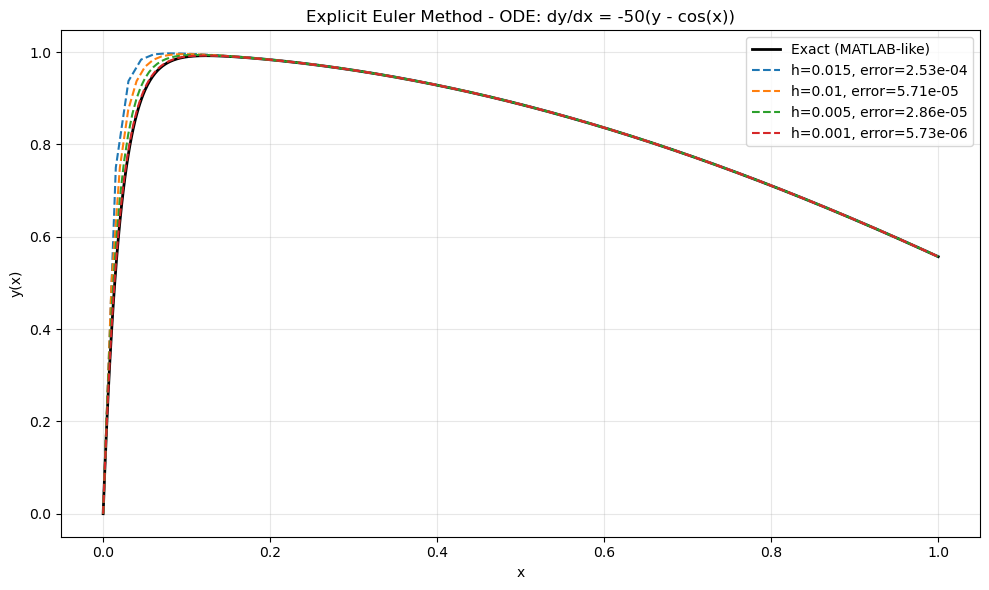


Explicit Euler Errors:
----------------------------------------
Step size h | Relative L2 Error
----------------------------------------
    0.0150   |   2.5257e-04
    0.0100   |   5.7061e-05
    0.0050   |   2.8597e-05
    0.0010   |   5.7302e-06



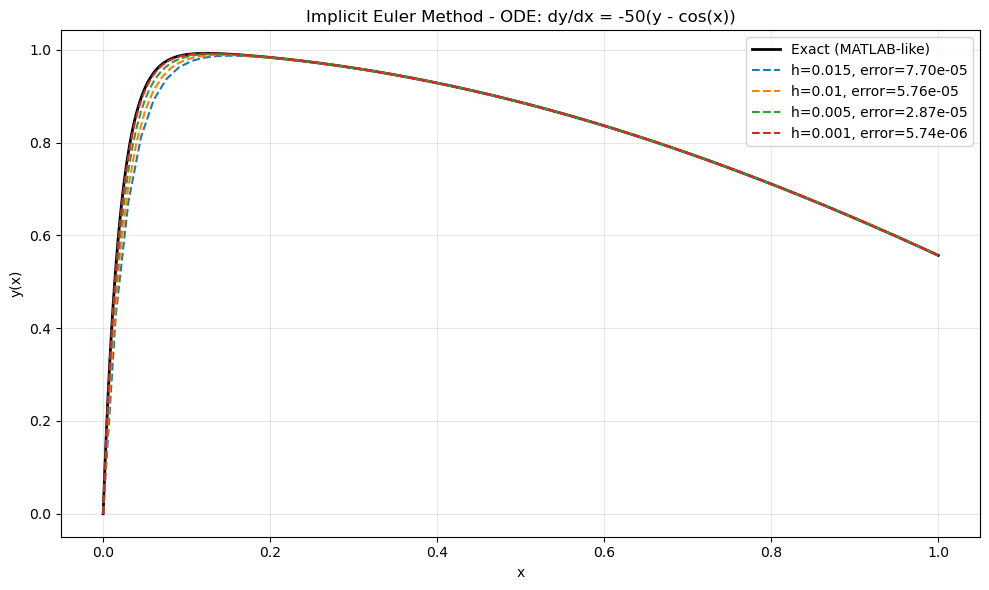


Implicit Euler Errors:
----------------------------------------
Step size h | Relative L2 Error
----------------------------------------
    0.0150   |   7.6998e-05
    0.0100   |   5.7595e-05
    0.0050   |   2.8731e-05
    0.0010   |   5.7355e-06



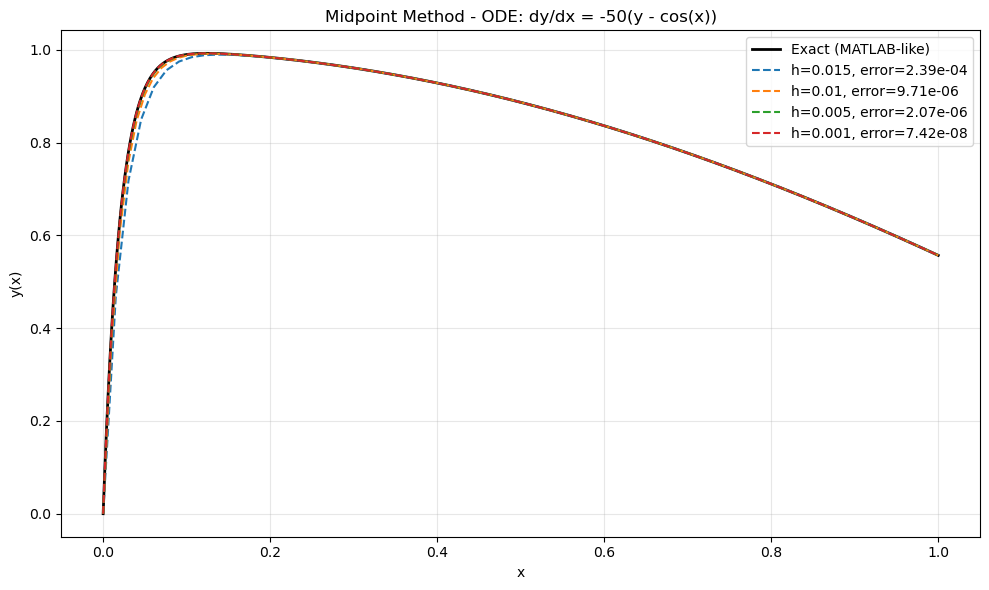


Midpoint Errors:
----------------------------------------
Step size h | Relative L2 Error
----------------------------------------
    0.0150   |   2.3877e-04
    0.0100   |   9.7135e-06
    0.0050   |   2.0728e-06
    0.0010   |   7.4234e-08



/home/mili/COE-347/HW02/solvers/trapezoidal.py:19: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last ten iterations.
  y[i+1] = fsolve(F, y_guess)[0]


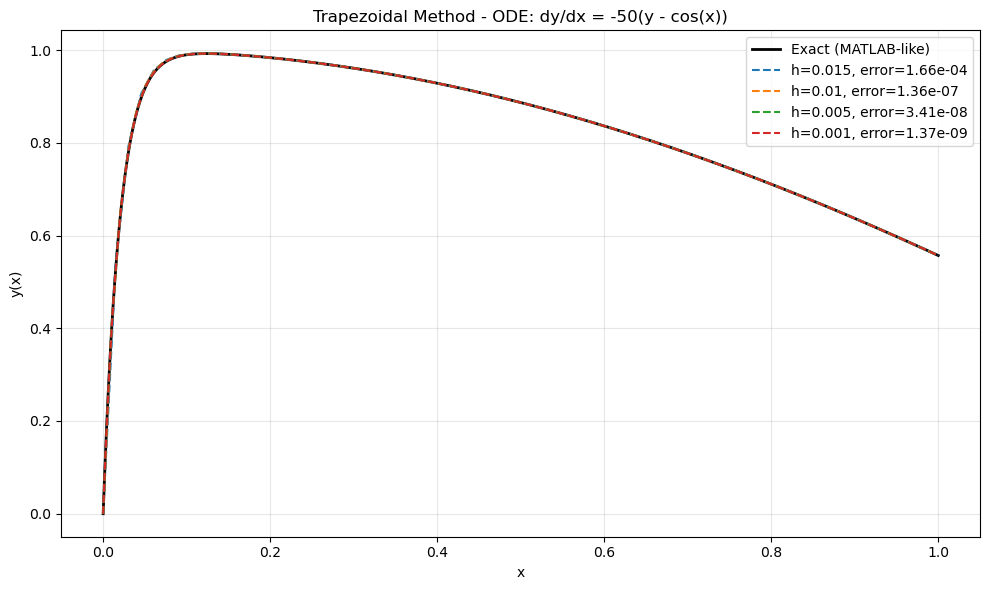


Trapezoidal Errors:
----------------------------------------
Step size h | Relative L2 Error
----------------------------------------
    0.0150   |   1.6572e-04
    0.0100   |   1.3648e-07
    0.0050   |   3.4120e-08
    0.0010   |   1.3651e-09



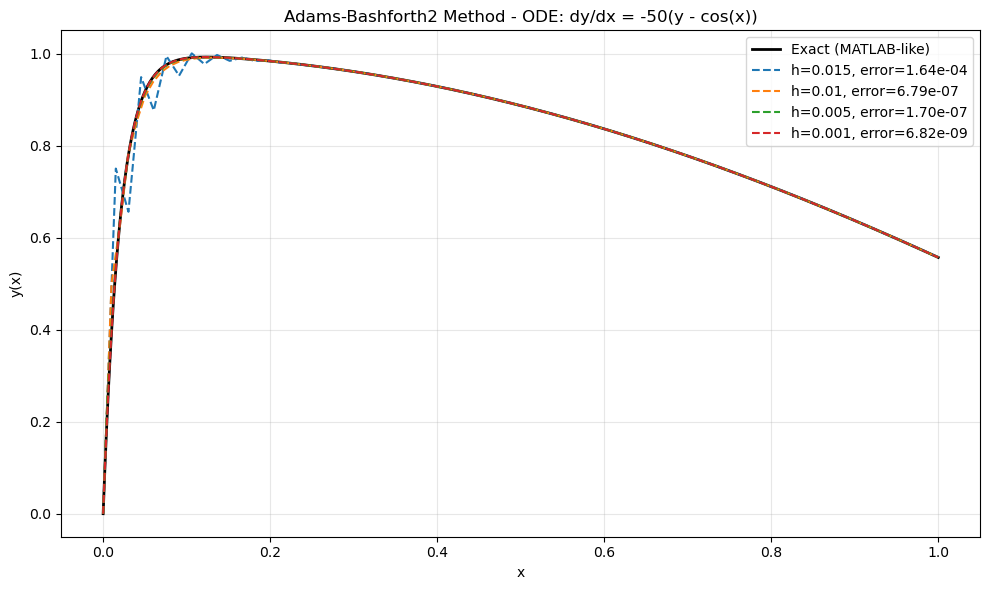


Adams-Bashforth2 Errors:
----------------------------------------
Step size h | Relative L2 Error
----------------------------------------
    0.0150   |   1.6383e-04
    0.0100   |   6.7948e-07
    0.0050   |   1.7024e-07
    0.0010   |   6.8207e-09



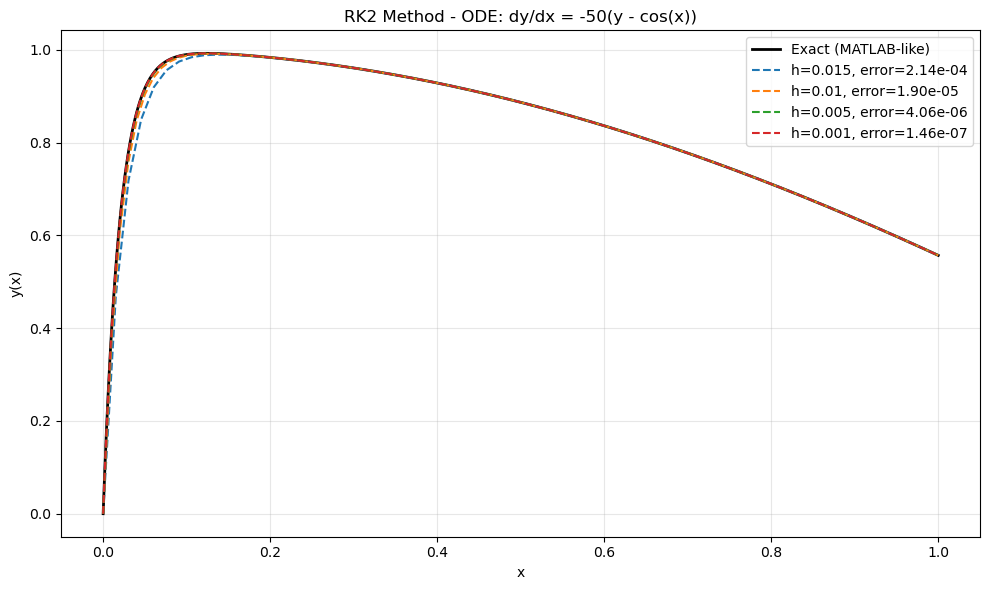


RK2 Errors:
----------------------------------------
Step size h | Relative L2 Error
----------------------------------------
    0.0150   |   2.1353e-04
    0.0100   |   1.9018e-05
    0.0050   |   4.0629e-06
    0.0010   |   1.4563e-07



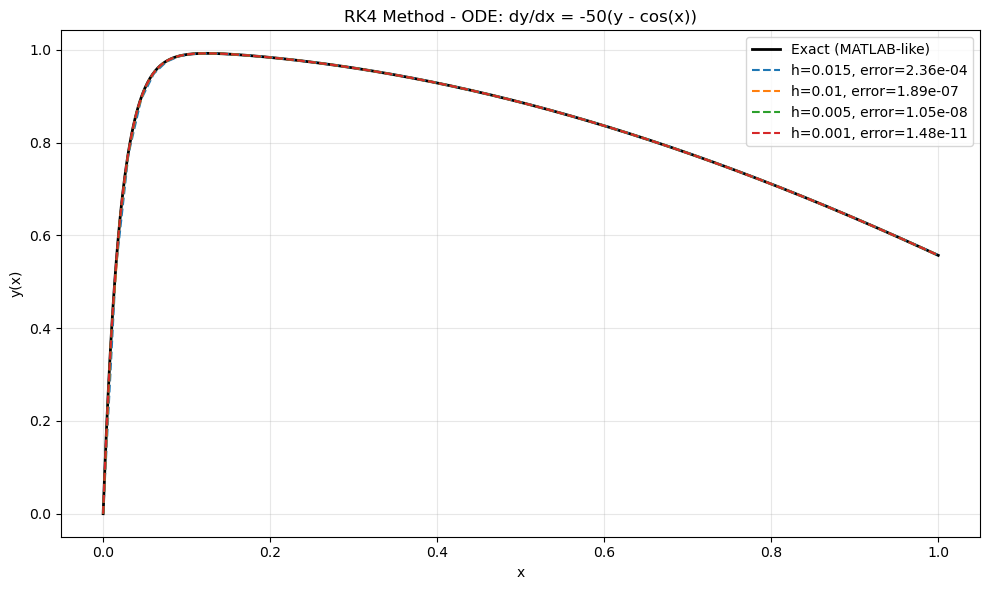


RK4 Errors:
----------------------------------------
Step size h | Relative L2 Error
----------------------------------------
    0.0150   |   2.3588e-04
    0.0100   |   1.8903e-07
    0.0050   |   1.0471e-08
    0.0010   |   1.4799e-11



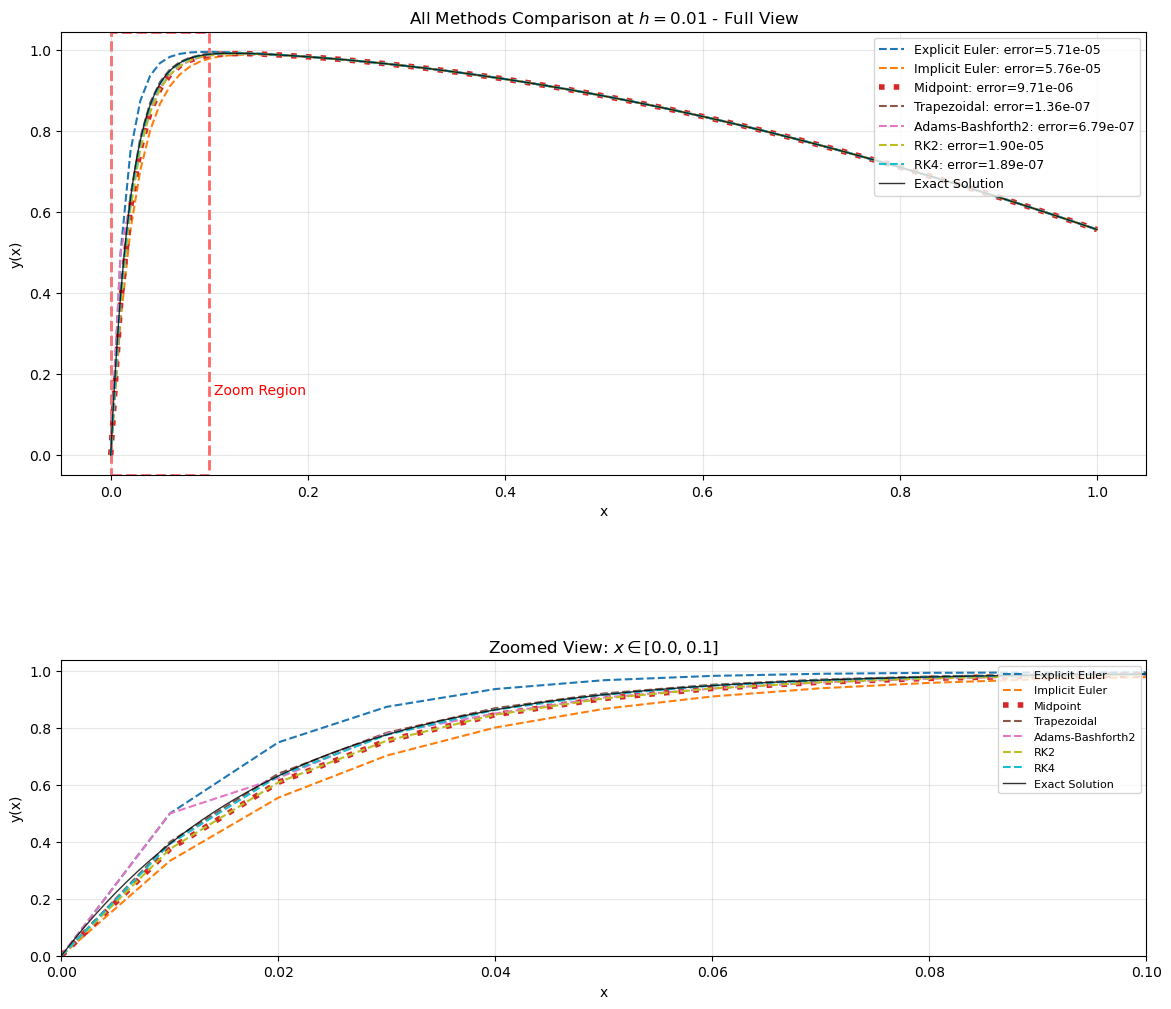

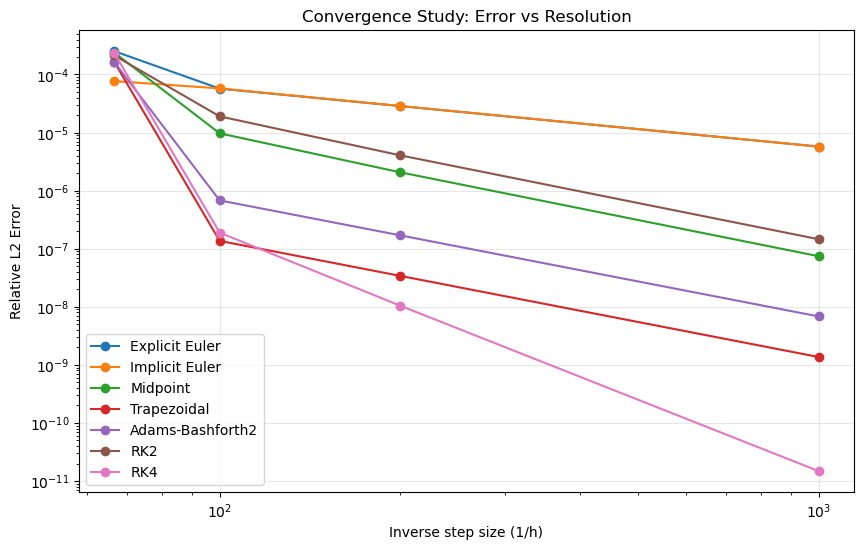

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.patches import Rectangle

from true import *
from solvers.euler_explicit import *
from solvers.euler_implicit import *
from solvers.midpoint import *
from solvers.trapezoidal import *
from solvers.ab_2 import *
from solvers.rk_2 import *
from solvers.rk_4 import *

# Define the ODE
def f(x, y):
    return -50 * (y - np.cos(x))

# Parameters
y0 = 0
x_range = [0, 1]
step_sizes = [0.015, 0.01, 0.005, 0.001]
step_sizes_large = step_sizes#  np.logspace(np.log10(.015), np.log10(.001), 30)
h_static = 0.01

# Get exact solution
sol_exact = exact_solution(f)
x_exact = np.linspace(0, 1, 1000)
y_exact = sol_exact.sol(x_exact)[0]

# Dictionary of methods
methods = {
    'Explicit Euler': explicit_euler,
    'Implicit Euler': implicit_euler,
    'Midpoint': midpoint,
    'Trapezoidal': trapezoidal,
    'Adams-Bashforth2': adams_bashforth2,
    'RK2': rk2,
    'RK4': rk4
}

# ===== HELPER FUNCTIONS =====
def compute_solution_error(method_func, h, return_evals=False):
    """Compute solution and error for a given method and step size"""
    if return_evals:
        x_num, y_num, evals = method_func(f, y0, x_range, h, return_evals=True)
    else:
        x_num, y_num = method_func(f, y0, x_range, h)
    y_exact_interp = sol_exact.sol(x_num)[0]
    error = compute_error(y_num, y_exact_interp)
    return (x_num, y_num, error, evals) if return_evals else (x_num, y_num, error)

def create_individual_plots():
    """Create individual plots for each method"""
    os.makedirs('solo_method', exist_ok=True)
    
    for method_name, method_func in methods.items():
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.plot(x_exact, y_exact, 'k-', linewidth=2, label='Exact (MATLAB-like)')
        
        errors_data = []
        for h in step_sizes:
            x_num, y_num, error = compute_solution_error(method_func, h)
            errors_data.append((h, error))
            ax.plot(x_num, y_num, '--', linewidth=1.5, 
                   label=f'h={h}, error={error:.2e}')
        
        ax.set(xlabel='x', ylabel='y(x)', 
               title=f'{method_name} Method - ODE: dy/dx = -50(y - cos(x))')
        ax.legend()
        ax.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.savefig(f'solo_method/{method_name.replace(" ", "_")}_comparison.png', 
                   dpi=150, bbox_inches='tight')
        plt.show()
        
        # Print errors table
        print(f"\n{method_name} Errors:")
        print("-" * 40)
        print("Step size h | Relative L2 Error")
        print("-" * 40)
        for h, error in errors_data:
            print(f"    {h:6.4f}   |   {error:.4e}")
        print()

def create_comparison_plot():
    """Create comparison plot with zoomed view"""
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 12), height_ratios=[3, 2])
    plt.subplots_adjust(hspace=0.5)
    
    colors = plt.cm.tab10(np.linspace(0, 1, len(methods)))
    color_dict = dict(zip(methods.keys(), colors))
    
    # Zoom region
    zoom_x_min, zoom_x_max = 0.0, 0.1
    
    for method_name, method_func in methods.items():
        x_num, y_num, error = compute_solution_error(method_func, h_static)
        
        # Style customization
        style, lw = ('dotted', 4.0) if method_name == 'Midpoint' else ('--', 1.5)
        
        # Plot on both axes
        for ax in [ax1, ax2]:
            ax.plot(x_num, y_num, linestyle=style, linewidth=lw, 
                   color=color_dict[method_name],
                   label=f'{method_name}' if ax == ax2 else f'{method_name}: error={error:.2e}')
    
    # Add exact solution
    for ax in [ax1, ax2]:
        ax.plot(x_exact, y_exact, 'k-', linewidth=1, label='Exact Solution', alpha=0.8)
    
    # Configure main plot
    ax1.set(xlabel='x', ylabel='y(x)', 
           title=rf'All Methods Comparison at $h={h_static}$ - Full View')
    ax1.legend(loc='upper right', fontsize=9)
    ax1.grid(True, alpha=0.3)
    
    # Configure zoomed plot
    ax2.set_xlim(zoom_x_min, zoom_x_max)
    zoom_idx = (x_exact >= zoom_x_min) & (x_exact <= zoom_x_max)
    y_min, y_max = y_exact[zoom_idx].min() * 0.95, y_exact[zoom_idx].max() * 1.05
    ax2.set_ylim(y_min, y_max)
    ax2.set(xlabel='x', ylabel='y(x)', 
           title=rf'Zoomed View: $x \in [{zoom_x_min}, {zoom_x_max}]$')
    ax2.legend(loc='upper right', fontsize=8)
    ax2.grid(True, alpha=0.3)
    
    # Add zoom rectangle
    rect = Rectangle((zoom_x_min, ax1.get_ylim()[0]), 
                    zoom_x_max - zoom_x_min, 
                    ax1.get_ylim()[1] - ax1.get_ylim()[0],
                    linewidth=2, edgecolor='red', facecolor='none', 
                    linestyle='--', alpha=0.6)
    ax1.add_patch(rect)
    ax1.text(zoom_x_max + 0.005, ax1.get_ylim()[0] + 0.2, 'Zoom Region', 
            color='red', fontsize=10)
    
    return fig, (ax1, ax2)

def create_convergence_plot():
    """Create convergence study plot"""
    fig, ax = plt.subplots(figsize=(10, 6))
    
    plot_data = {}
    all_data = {}
    for method_name, method_func in methods.items():
        
        x_num, y_num, error, evals = zip(
            *[compute_solution_error(method_func, h, return_evals=True)
            for h in step_sizes_large]
        )

        # optional: convert to numpy arrays

        errors  = np.array(error)
        evals  = np.array(evals)

        # errors = [compute_solution_error(method_func, h)[2] for h in step_sizes]
        x_vals = 1 / np.array(step_sizes_large[::-1])
        y_vals = errors[::-1]
        plot_data[method_name] = (x_vals, y_vals)
        all_data[method_name] = (x_num, y_num, errors, evals)

        ax.plot(x_vals, y_vals, 'o-', label=method_name)
    
    ax.set(xlabel='Inverse step size (1/h)', ylabel='Relative L2 Error',
           title='Convergence Study: Error vs Resolution')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    return fig, ax, plot_data, all_data


# 1. Individual method plots
create_individual_plots()

# 2. All methods comparison plot
fig_comp, _ = create_comparison_plot()
os.makedirs('comparisons', exist_ok=True)
fig_comp.savefig(f'comparisons/all_methods_comparison_h={h_static}.png', 
                dpi=150, bbox_inches='tight')
plt.show()

# 3. Convergence plot
fig_conv, _, plot_data, all_data = create_convergence_plot()
fig_conv.savefig('comparisons/convergence_study.png', dpi=150, bbox_inches='tight')
plt.show()

# 1.3

In [4]:
expected_order = {
    "Explicit Euler": 1,
    "Implicit Euler": 1,
    "Midpoint": 2,
    "Trapezoidal": 2,
    "Adams-Bashforth2": 2,
    "RK2": 2,
    "RK4": 4,
}

for method, (inv_h, errors) in plot_data.items():
    h = 1.0 / np.array(inv_h)
    E = np.array(errors)

    # log–log fit
    alpha, logC = np.polyfit(np.log(h), np.log(E), 1)
    alpha_exp = expected_order.get(method, None)

    if alpha_exp is not None:
        print(f"{method:20s}: alpha ≈ {alpha:.2f} (expected {alpha_exp})")
    else:
        print(f"{method:20s}: alpha ≈ {alpha:.2f}")


Explicit Euler      : alpha ≈ 1.27 (expected 1)
Implicit Euler      : alpha ≈ 0.97 (expected 1)
Midpoint            : alpha ≈ 2.70 (expected 2)
Trapezoidal         : alpha ≈ 3.55 (expected 2)
Adams-Bashforth2    : alpha ≈ 3.15 (expected 2)
RK2                 : alpha ≈ 2.50 (expected 2)
RK4                 : alpha ≈ 5.45 (expected 4)


# 1.4

In [48]:
all_data['Explicit Euler'][3] # x_num, y_num, errors, evals)

array([  66,  100,  200, 1000])

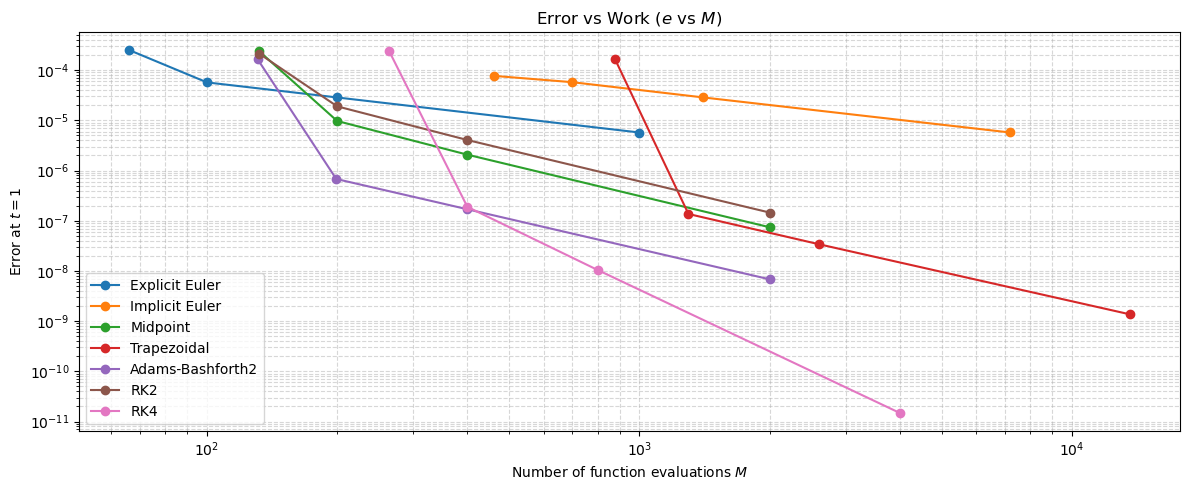

In [55]:
plt.figure(figsize=(12, 5))

for method in all_data.keys():
    M_vals = all_data[method][3]
    e_vals = all_data[method][2]


    M_vals = np.array(M_vals, dtype=float)
    e_vals = np.array(e_vals, dtype=float)

    plt.loglog(M_vals, e_vals, marker='o', label=method)

plt.xlabel(r'Number of function evaluations $M$')
plt.ylabel(r'Error at $t = 1$')
plt.title(r'Error vs Work ($e$ vs $M$)')
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.5)
plt.tight_layout()
plt.show()


The log–log plot of error $e$ versus number of function evaluations $M$ reveals the relative efficiency of the time integration methods. First-order methods such as Explicit Euler require significantly more function evaluations to achieve a given accuracy, as evidenced by their shallow slope. Higher-order methods achieve lower error for the same computational effort, resulting in steeper curves. Implicit methods incur additional function evaluations due to the nonlinear solve at each time step; however, for sufficiently small errors, they can outperform explicit methods in terms of accuracy per unit work. Overall, the results highlight the trade-off between per-step cost and convergence order, emphasizing that higher-order and implicit methods become advantageous when higher accuracy is required.